<a href="https://colab.research.google.com/github/omkar111999/omkar111999/blob/main/Climate_Change_Forecasting_with_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our goal is to develop a predictive model using ARIMA to forecast future temperature trends.


In [8]:
#importing important libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

 


In [9]:
df = pd.read_csv('/content/GlobalLandTemperaturesByCity.csv')

In [10]:
df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


data cleaninng 


The dataset I am using contains temperature readings for Denmark over a period of time.



In [11]:
#removing null values from the dataset 
df = df.dropna()
df_denmark = df[df.Country == "Denmark"]
df_denmark.index = pd.to_datetime(df_denmark.dt)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [12]:
#droping un wanted column
df_denmark = df_denmark.drop(['dt','AverageTemperatureUncertainty'],axis=1)
df_denmark.describe()

,AverageTemperature
count,6332.000000
mean,7.695135
std,6.557923
min,-7.816000
25%,2.055000
50%,7.055000
75%,13.944000
max,20.883000


In [15]:
#storing averagetemperature in a variable 
ts = df_denmark["AverageTemperature"]
ts

dt
1743-11-01     6.068
1744-04-01     5.788
1744-05-01    10.644
1744-06-01    14.051
1744-07-01    16.082
               ...  
2013-04-01     5.514
2013-05-01    12.770
2013-06-01    15.223
2013-07-01    18.259
2013-08-01    17.423
Name: AverageTemperature, Length: 6332, dtype: float64

visualizing the data 


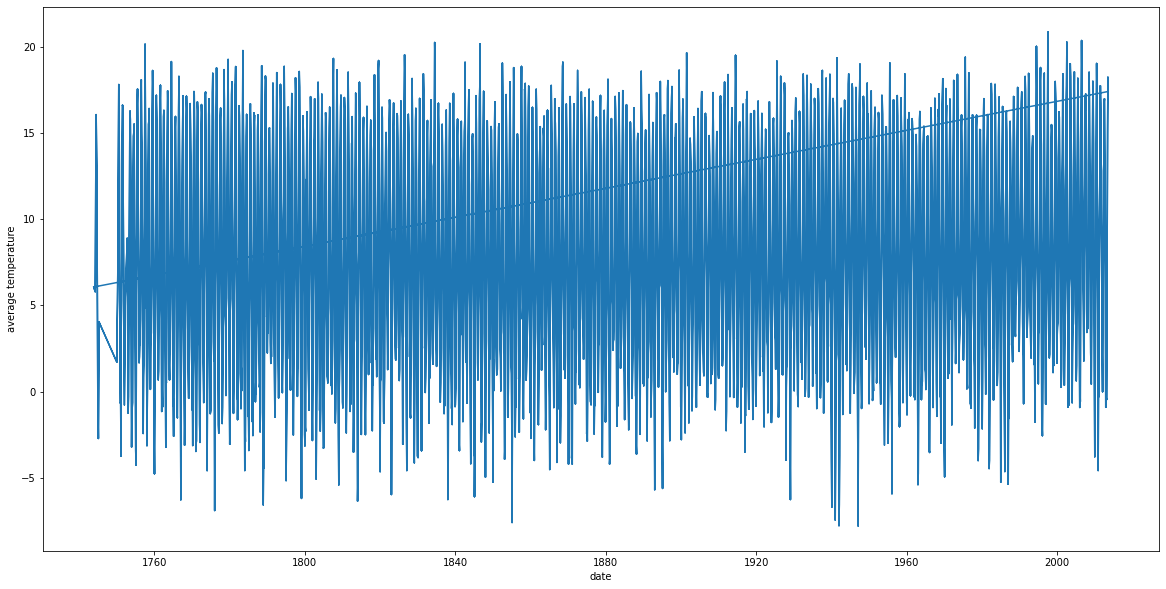

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
fig = plt.figure(1)
ax1 = fig.add_subplot(111) # 111: no of rows, cols, index
ax1.set_xlabel("date")
ax1.set_ylabel("average temperature")
ax1.plot(ts)

In [18]:
df.mean  


<bound method NDFrame._add_numeric_operations.<locals>.mean of                 dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               6.068                          1.737   
5       1744-04-01               5.788                          3.624   
6       1744-05-01              10.644                          1.283   
7       1744-06-01              14.051                          1.347   
8       1744-07-01              16.082                          1.396   
...            ...                 ...                            ...   
497354  1880-06-01               9.480                          1.348   
497355  1880-07-01               9.280                          1.319   
497356  1880-08-01               9.883                          1.227   
497357  1880-09-01               9.284                          1.565   
497358  1880-10-01              10.630                          1.305   

            City  Country Latitude Longitude  
0          År

The ADF (Augmented Dickey-Fuller) test for stationarity

The null hypothesis of the test is that the time series data 
is non-stationary. If p-value < 5%, we reject the null hypothesis

As we can see in the visualisation, we cannot identify a trend or seasonal component. Our next step is to check if data is stationary.

Stationarity:

* Mean is constant
* Standard deviation is constant
* No seasonality (ie. No predictable, periodic behavior over time)

White noise

Mean is 0

Standard deviation is constant

No seasonality

How to check for stationarity?
Visually

Global vs local tests

ADF test


In [19]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ts, autolag='AIC')
print(f'ADF Statistic:{adf_result[0]}')
print(f'p-value:{adf_result[1]}')

for percentage,value in adf_result[4].items():
    print("Critical Value:")
    print(f'{percentage}{value}')

ADF Statistic:-9.878337284067818
p-value:3.8289557725808896e-17
Critical Value:
1%-3.4313889022895148
Critical Value:
5%-2.8619991032862404
Critical Value:
10%-2.567014377653714


Since p-value is much smaller than 5% , we reject the null hypothesis. Hence, time series data is stationary

#Autoregressive Moving Average (ARMA) Model¶


In [20]:
from statsmodels.tsa.arima.model import ARIMA

newmodel = ARIMA(ts, order =(1,0,1)) 
#order: (p,d,q) = autoregressive (p), differencing (d), moving average (q) 

results = newmodel.fit()
predictions = results.predict(start = '01/01/1990',end = '01/01/1991')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels

#model evaluation 

In [21]:
#to check accuracy of our ARIMA model, keeping actual values aside

actuals = df_denmark['01/01/1990':'01/01/1991']['AverageTemperature'][0:13]

In [22]:
# Mean Absolute error: calculates the avg absolute diff between prediction and actuals

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13],predictions)
print(f'MAE:{mae}')

MAE:1.8183766727096908


#Model Tuning para


In [23]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')

# parameter ranges
p = range(0, 4)
d = 0 #ARMA model
q = range(0, 4)

# all possible combinations of p and q
pq = itertools.product(p, q)

best_aic = float('inf') 
best_order = None

for order in pq:
    try:
        model = ARIMA(ts, order=(*order, d))
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
        print(f'ARMA{order} - AIC: {aic:.2f}')
    except:
        continue

print(f'Best ARMA model: ARMA{best_order} - AIC: {best_aic:.2f}')

ARMA(0, 0) - AIC: 41789.29
ARMA(0, 1) - AIC: 34908.57
ARMA(0, 2) - AIC: 34131.54
ARMA(0, 3) - AIC: 39902.47
ARMA(1, 0) - AIC: 34360.80
ARMA(1, 1) - AIC: 32554.93
ARMA(1, 2) - AIC: 33739.75
ARMA(1, 3) - AIC: 36307.75
ARMA(2, 0) - AIC: 30080.78
ARMA(2, 1) - AIC: 32550.76
ARMA(2, 2) - AIC: 33684.81
ARMA(2, 3) - AIC: 35328.67
ARMA(3, 0) - AIC: 28024.37
ARMA(3, 1) - AIC: 31858.93
ARMA(3, 2) - AIC: 33664.67
ARMA(3, 3) - AIC: 35233.82
Best ARMA model: ARMA(3, 0) - AIC: 28024.37


In [24]:
newmodel = ARIMA(ts, order =(3,0,0)) 
#order: (p,d,q) = autoregressive (p), differencing (d), moving average (q) 

results = newmodel.fit()
predictions = results.predict(start = '01/01/1990',end = '01/01/1991')

In [25]:
predictions = results.predict(start = '01/01/1990',end = '01/01/1991')
mae = mean_absolute_error(actuals[0:13],predictions)
print(f'MAE:{mae}')

MAE:1.5810013461753447
